Now we understood the image data generator module.It's one of important modules to load image data.Now use the following link of flowers dataset.Split your data in 80:20 ratio of train and validation data.Build CNN model with good score.
use link for downloading data:
https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz

In [ ]:
!wget https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz

--2023-06-12 12:55:30--  https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.128, 74.125.200.128, 74.125.68.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228813984 (218M) [application/x-compressed-tar]
Saving to: ‘flower_photos.tgz’

flower_photos.tgz   100%[===================>] 218.21M  22.7MB/s    in 11s     

2023-06-12 12:55:41 (20.4 MB/s) - ‘flower_photos.tgz’ saved [228813984/228813984]



In [ ]:
import shutil
shutil.unpack_archive("flower_photos.tgz", "./flower_photos")

In [ ]:
L = ['daisy','dandelion','roses','sunflowers','tulips']

import os
'''for i in L:
  i = os.path.join('./flower_photos/flower_photos/{0}'.format(i)) #print('{0} and {1}'.format('Geeks', 'Portal'))
  print(i)'''


daisy_dir=os.path.join('./flower_photos/flower_photos/daisy')
dandelion_dir=os.path.join('./flower_photos/flower_photos/dandelion')
roses_dir=os.path.join('./flower_photos/flower_photos/roses')
sunflowers_dir=os.path.join('./flower_photos/flower_photos/sunflowers')
tulips_dir=os.path.join('./flower_photos/flower_photos/tulips')




In [ ]:
daisy_names = os.listdir(daisy_dir)
dandelion_names = os.listdir(dandelion_dir)
roses_names = os.listdir(roses_dir)
sunflowers_names = os.listdir(sunflowers_dir)
tulips_names =  os.listdir(tulips_dir)

print(len(daisy_names))
print(len(dandelion_names))
print(len(roses_names))
print(len(sunflowers_names))
print(len(tulips_names))

633
898
641
699
799


In [ ]:
for i,j in enumerate(L):
  print(i,j)

0 daisy
1 dandelion
2 roses
3 sunflowers
4 tulips


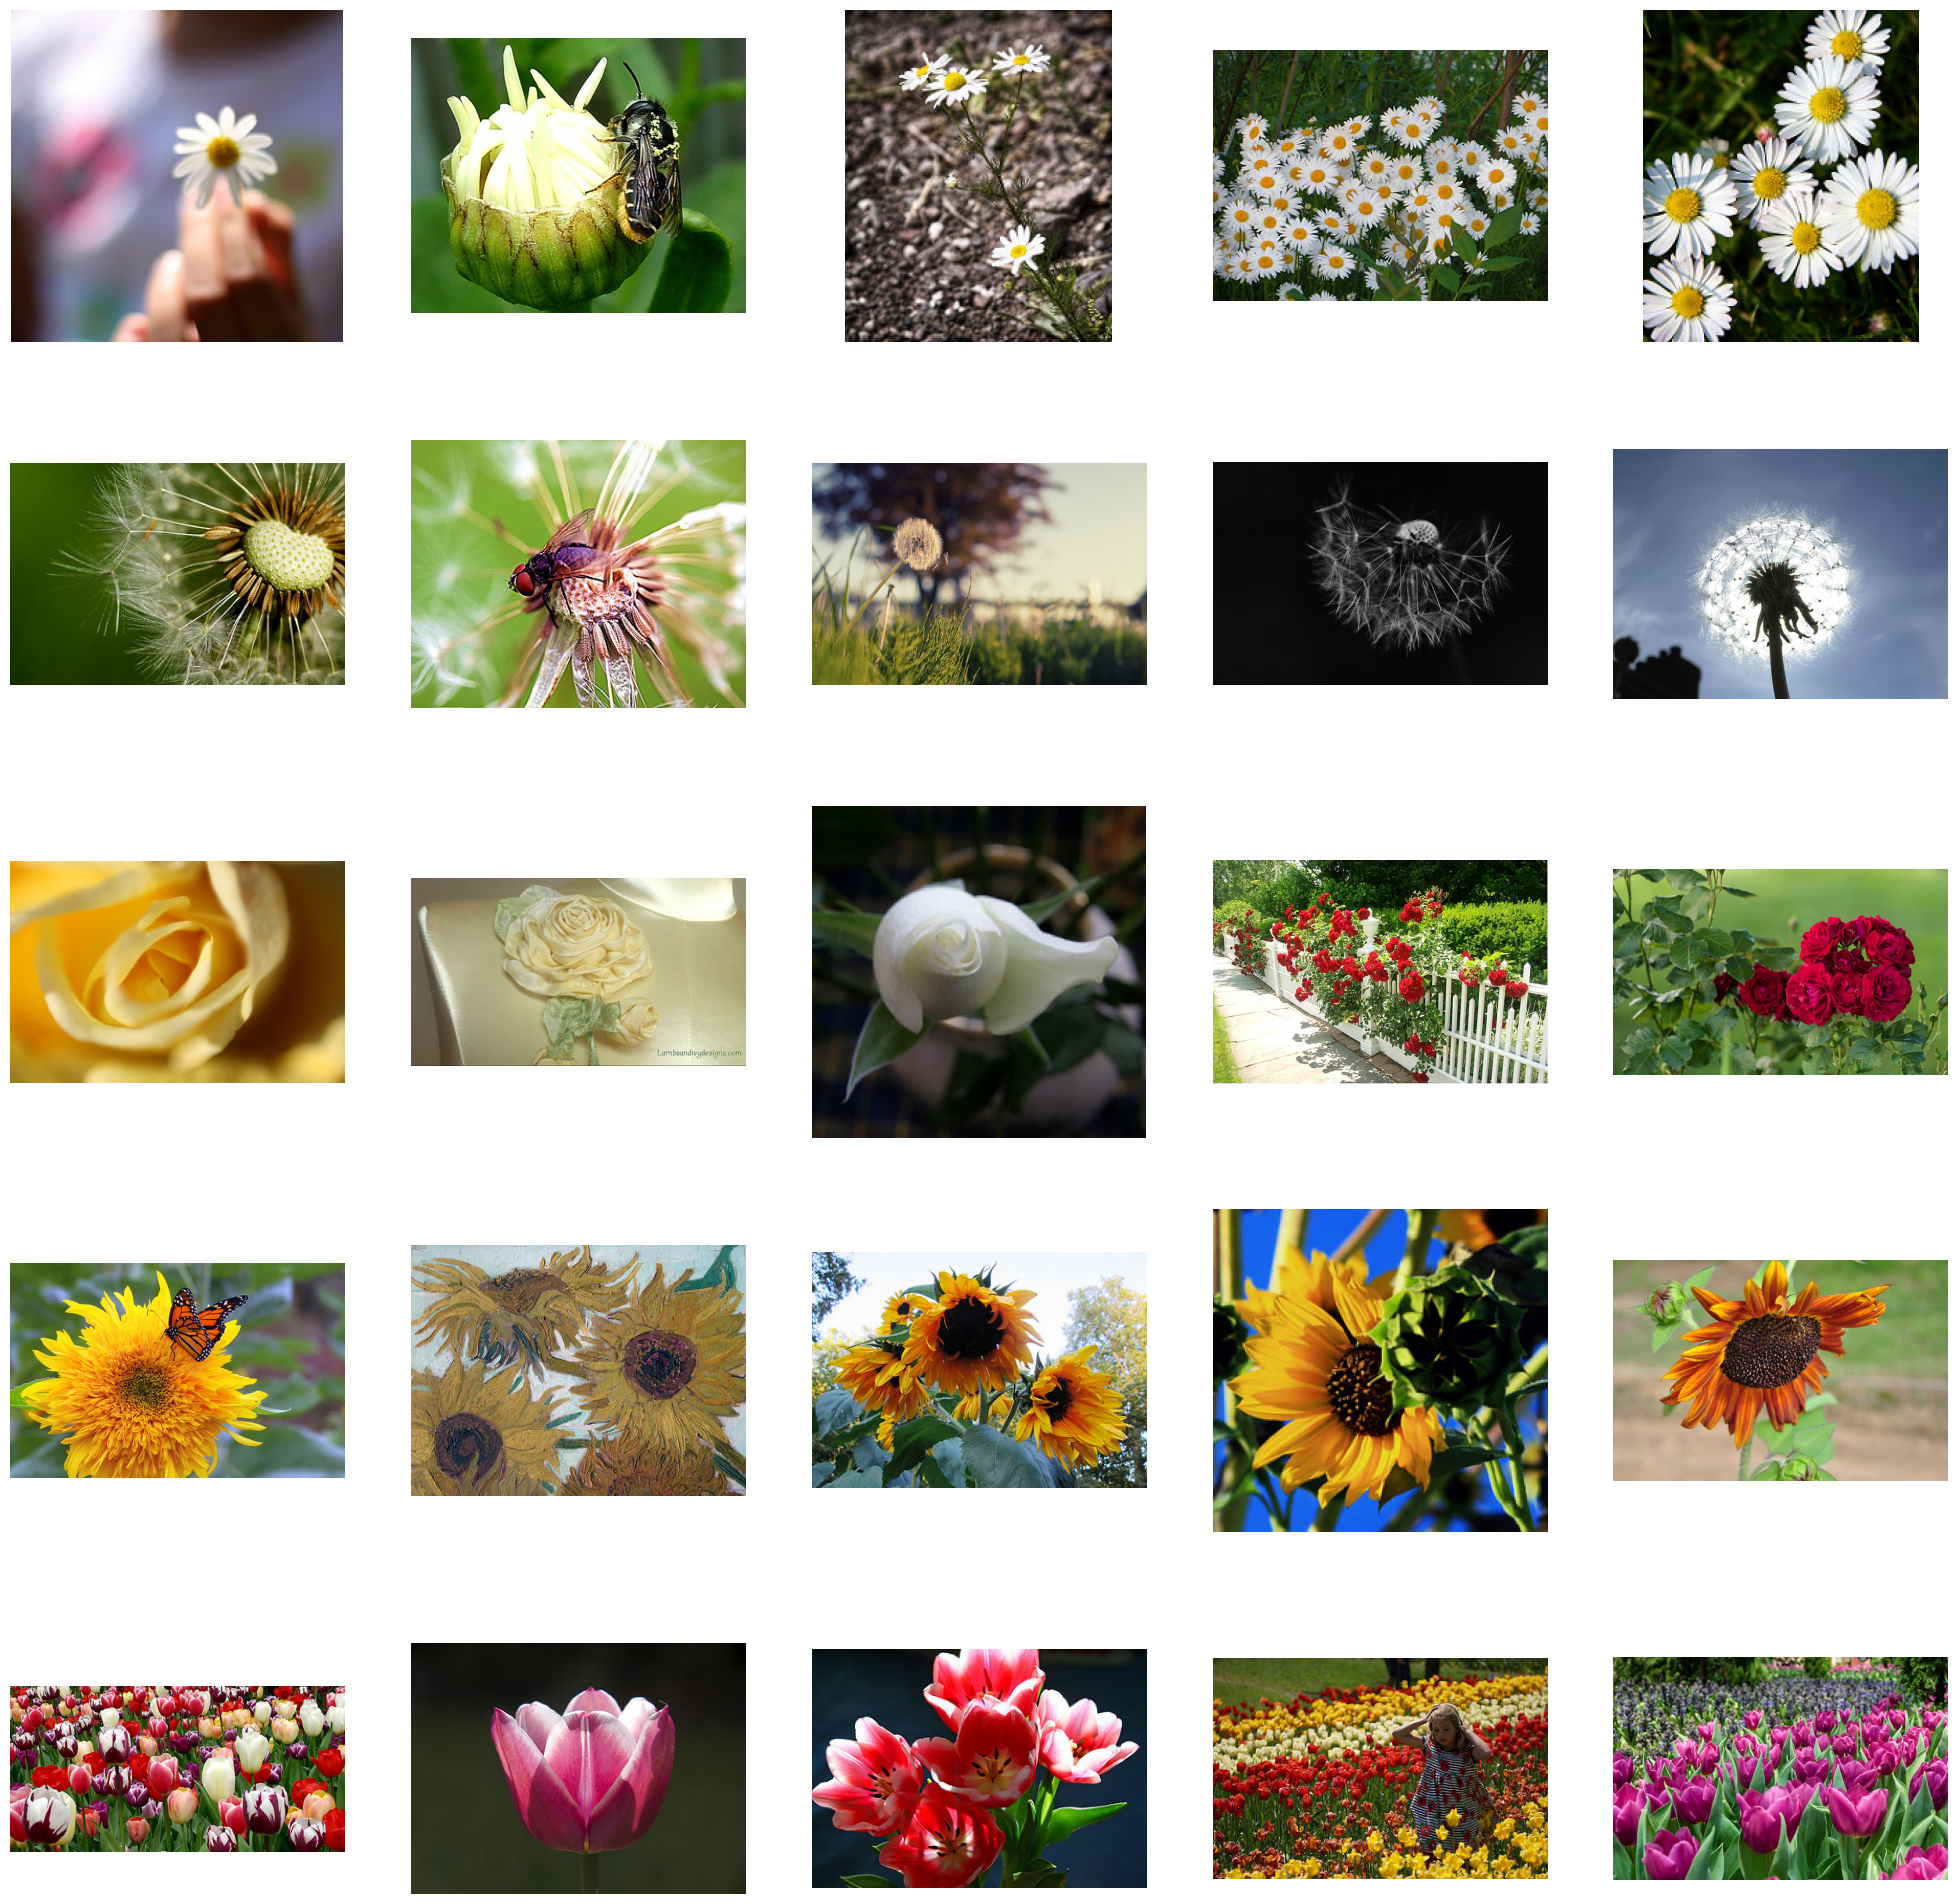

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 5
ncols = 5
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 5, nrows * 5)

daisy_pic = [os.path.join(daisy_dir,fname) for fname in daisy_names[pic_index:pic_index+5]]
dandelion_pic = [os.path.join(dandelion_dir,fname) for fname in dandelion_names[pic_index:pic_index+5]]
roses_pic = [os.path.join(roses_dir,fname) for fname in roses_names[pic_index:pic_index+5]]
sunflowers_pic = [os.path.join(sunflowers_dir,fname) for fname in sunflowers_names[pic_index:pic_index+5]]
tulips_pic = [os.path.join(tulips_dir,fname) for fname in tulips_names[pic_index:pic_index+5]]

for i,img_path in enumerate(daisy_pic+dandelion_pic+roses_pic+sunflowers_pic+tulips_pic):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop,Adam

In [ ]:
!pip install tensorflow_hub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2
import tensorflow_hub as hub
from keras.layers import Dense,Flatten
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range= 0.3,
        width_shift_range = 0.3,
        height_shift_range = 0.3,
        featurewise_std_normalization= True,
        rotation_range = 20,
        validation_split= 0.25)

train_generator = train_datagen.flow_from_directory("./flower_photos/flower_photos",
                                                    target_size= (224,224),
                                                    batch_size = 120,
                                                    class_mode = 'categorical',
                                                    subset='training')

val_generator = train_datagen.flow_from_directory("./flower_photos/flower_photos",
                                                    target_size= (224,224),
                                                    batch_size = 120,
                                                    class_mode = 'categorical',
                                                    subset='validation')


Found 2755 images belonging to 5 classes.
Found 915 images belonging to 5 classes.


/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1460: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, which overrides setting of `featurewise_center`.
  warnings.warn(


#Transfer Learning

In [ ]:
classifier = tf.keras.Sequential([hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/classification/5",input_shape = (224,224,3), trainable= False)])

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              6158505   
                                                                 
Total params: 6,158,505
Trainable params: 0
Non-trainable params: 6,158,505
_________________________________________________________________


In [ ]:
classifier.add(Flatten())
classifier.add(Dense(5,activation = "softmax"))

In [ ]:
classifier.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [ ]:
classifier.fit(train_generator,epochs=40,validation_data=val_generator,verbose =1, steps_per_epoch= 8)

/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1871: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/40
8/8 [==============================] - 47s 4s/step - loss: 1.9700 - accuracy: 0.2974 - val_loss: 1.3322 - val_accuracy: 0.4754
Epoch 2/40
8/8 [==============================] - 29s 4s/step - loss: 1.0870 - accuracy: 0.5906 - val_loss: 0.9126 - val_accuracy: 0.6536
Epoch 3/40
8/8 [==============================] - 28s 4s/step - loss: 0.7738 - accuracy: 0.7125 - val_loss: 0.7025 - val_accuracy: 0.7563
Epoch 4/40
8/8 [==============================] - 27s 4s/step - loss: 0.5593 - accuracy: 0.8010 - val_loss: 0.5619 - val_accuracy: 0.7902
Epoch 5/40
8/8 [==============================] - 34s 5s/step - loss: 0.5716 - accuracy: 0.7781 - val_loss: 0.5493 - val_accuracy: 0.8044
Epoch 6/40
8/8 [==============================] - 27s 4s/step - loss: 0.4776 - accuracy: 0.8366 - val_loss: 0.5279 - val_accuracy: 0.8055
Epoch 7/40
8/8 [==============================] - 38s 5s/step - loss: 0.4251 - accuracy: 0.8545 - val_loss: 0.4865 - val_accuracy: 0.8219
Epoch 8/40
8/8 [==================

#Multilayer CNN

In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.AveragePooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.AveragePooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.AveragePooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.AveragePooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.AveragePooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = "relu"),  #LeakyReLU
    tf.keras.layers.Dense(5, activation='softmax')
])



model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001,beta_1=0.5),
              metrics=['accuracy'])

In [ ]:
'model.summary()'

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_56 (Conv2D)          (None, 298, 298, 16)      448       
                                                                 
 average_pooling2d_56 (Avera  (None, 149, 149, 16)     0         
 gePooling2D)                                                    
                                                                 
 conv2d_57 (Conv2D)          (None, 147, 147, 128)     18560     
                                                                 
 average_pooling2d_57 (Avera  (None, 73, 73, 128)      0         
 gePooling2D)                                                    
                                                                 
 conv2d_58 (Conv2D)          (None, 71, 71, 128)       147584    
                                                                 
 average_pooling2d_58 (Avera  (None, 35, 35, 128)     

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=10,
      epochs=90,
      verbose=1,
      validation_data=val_generator)

Epoch 1/150
8/8 [==============================] - 54s 7s/step - loss: 1.6327 - accuracy: 0.2438 - val_loss: 1.7096 - val_accuracy: 0.1749
Epoch 2/150
8/8 [==============================] - 64s 9s/step - loss: 1.6053 - accuracy: 0.2479 - val_loss: 1.5821 - val_accuracy: 0.2623
Epoch 3/150
8/8 [==============================] - 45s 6s/step - loss: 1.7301 - accuracy: 0.3194 - val_loss: 1.5138 - val_accuracy: 0.3268
Epoch 4/150
8/8 [==============================] - 46s 6s/step - loss: 1.5744 - accuracy: 0.2775 - val_loss: 1.4956 - val_accuracy: 0.3104
Epoch 5/150
8/8 [==============================] - 45s 6s/step - loss: 1.4049 - accuracy: 0.3749 - val_loss: 1.4984 - val_accuracy: 0.3902
Epoch 6/150
8/8 [==============================] - 44s 6s/step - loss: 1.3775 - accuracy: 0.3896 - val_loss: 1.3573 - val_accuracy: 0.4098
Epoch 7/150
8/8 [==============================] - 45s 6s/step - loss: 1.3363 - accuracy: 0.3969 - val_loss: 1.3175 - val_accuracy: 0.4459
Epoch 8/150
8/8 [==========

In [ ]:
import tensorflow as tf

'''# Custom callback to stop execution based on different conditions
class CustomStopCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        # Condition at epoch end
        if logs.get('val_loss') < 0.05:
            self.model.stop_training = True

    def on_batch_end(self, batch, logs=None):
        # Condition at batch end
        if batch % 100 == 0 and logs.get('loss') < 0.1:
            self.model.stop_training = True

    def on_epoch_begin(self, epoch, logs=None):
        # Condition at epoch before
        if epoch == 4:
            self.model.stop_training = True

    def on_batch_begin(self, batch, logs=None):
        # Condition at batch before
        if batch == 9:
            self.model.stop_training = True

# Create the custom callback
custom_callback = CustomStopCallback()

# Compile and train your model, specifying the custom callback
model.compile(optimizer='adam', loss='mse')
model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), callbacks=[custom_callback])'''